## The idea is to subset the datasets by confidence/strength of the signal, starting with a more stringent set and re-plotting relaxing the enhancer calls (expanding the set of peaks that gets compared)

In [1]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/
wc -l deep_atac_starr/deep_atac_starr_orientation_dep_call_bin_all.bed
wc -l lentiMPRA/lenti_mpra_orientation_dep_call_all.bed
wc -l Tewhey_mpra/tewhey_mpra_orientation_dep_call_all.bed

392486 deep_atac_starr/deep_atac_starr_orientation_dep_call_bin_all.bed
16644 lentiMPRA/lenti_mpra_orientation_dep_call_all.bed
94697 Tewhey_mpra/tewhey_mpra_orientation_dep_call_all.bed


In [88]:
%%bash
cat /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all.bed | grep 'Enhancer' \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.bed

In [89]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_atac_starr_orientation_dep_call_bin_all.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_atac_starr_orientation_dep_call_bin_all.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lenti_mpra_orientation_dep_call_all.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lenti_mpra_orientation_dep_call_all.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.sorted.bed


In [101]:
!head /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_atac_starr_orientation_dep_call_bin_all.bed

chr1	115550	115800	.	1.04596330234056	-	Enhancer	0.0076008804758163
chr1	118550	118800	.	1.83184682321716	+	Enhancer	0.0050033752483434
chr1	134050	134300	.	2.00399424613749	-	Enhancer	0.0100901703033213
chr1	135050	135300	.	1.30656928841673	+	Enhancer	0.0427747181247456
chr1	605300	605550	.	1.09427249401705	-	Enhancer	0.0212343166796321
chr1	778300	778550	.	1.26814279367353	+	Enhancer	0.0011902218270428
chr1	778550	778800	.	1.69516032203046	-	Enhancer	4.475612270317492e-06
chr1	778550	778800	.	1.52495553216222	+	Enhancer	1.5955899724692406e-05
chr1	842800	843050	.	1.59784889179622	-	Enhancer	0.0019748658277083
chr1	1002050	1002300	.	1.00828974301841	-	Enhancer	0.0188035322794369


In [60]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep
module load bedtools2
bedtools intersect \
-a deep_atac_starr_orientation_dep_call_bin_all.sorted.bed \
-b lenti_mpra_orientation_dep_call_all.sorted.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_atac_starr_LentiMPRA_orientation_dep_shared_peaks.bed

In [70]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep
module load bedtools2
bedtools intersect \
-a deep_atac_starr_LentiMPRA_orientation_dep_shared_peaks.bed \
-b tewhey_mpra_orientation_dep_call_all.sorted.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_atac_starr_LentiMPRA_tewheyMPRA_orientation_dep_shared_peaks.bed

In [72]:
!head /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_atac_starr_LentiMPRA_tewheyMPRA_orientation_dep_shared_peaks.bed

chr1	2180200	2180450	.	1.19976158707795	+	Enhancer	0.004420217494006	chr1	2180416	2180616	peak107	1.89114005288112	+	Enhancer	1.20658017524676e-29	chr1	2180416	2180616	peak107	1.08543897384899	+	Enhancer	7.9106380668151e-07
chr1	2180200	2180450	.	1.19976158707795	+	Enhancer	0.004420217494006	chr1	2180416	2180616	peak107_Reversed:	1.52133859371933	-	Enhancer	1.34937773669737e-38	chr1	2180416	2180616	peak107	1.08543897384899	+	Enhancer	7.9106380668151e-07
chr1	2180250	2180500	.	1.30405494909094	-	Enhancer	0.000619597861296	chr1	2180416	2180616	peak107	1.89114005288112	+	Enhancer	1.20658017524676e-29	chr1	2180416	2180616	peak107	1.08543897384899	+	Enhancer	7.9106380668151e-07
chr1	2180250	2180500	.	1.30405494909094	-	Enhancer	0.000619597861296	chr1	2180416	2180616	peak107_Reversed:	1.52133859371933	-	Enhancer	1.34937773669737e-38	chr1	2180416	2180616	peak107	1.08543897384899	+	Enhancer	7.9106380668151e-07
chr1	2180250	2180500	.	1.58328275671589	+	Enhancer	0.0001735491944529	chr1	2180416	2

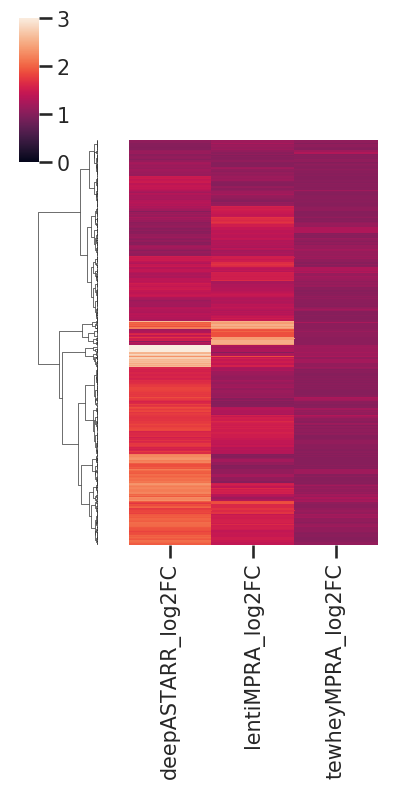

In [78]:
import pandas as pd
import seaborn as sns

shared_peaks = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_atac_starr_LentiMPRA_tewheyMPRA_orientation_dep_shared_peaks.bed', sep='\t',
                           names=['deepASTARR_chr','deepASTARR_start','deepASTARR_end','deepASTARR_peak','deepASTARR_log2FC','deepASTARR_strand','deepASTARR_enhancer','deepASTARR_padj',
                                  'lentiMPRA_chr','lentiMPRA_start','lentiMPRA_end','lentiMPRA_peak','lentiMPRA_log2FC','lentiMPRA_strand','lentiMPRA_enhancer','lentiMPRA_padj',
                                  'tewheyMPRA_chr','tewheyMPRA_start','tewheyMPRA_end','tewheyMPRA_peak','tewheyMPRA_log2FC','tewheyMPRA_strand','tewheyMPRA_enhancer','tewheyMPRA_padj'])
shared_peaks = shared_peaks.sort_values(by=['deepASTARR_log2FC','lentiMPRA_log2FC','tewheyMPRA_log2FC'], ascending=False)
#shared_peaks[['deepASTARR_log2FC','lentiMPRA_log2FC','tewheyMPRA_log2FC']]

sns.clustermap(shared_peaks.loc[:, ['deepASTARR_log2FC','lentiMPRA_log2FC','tewheyMPRA_log2FC']],
               vmin=0, 
               vmax=3, 
               method='ward',
               figsize=[4,8],
               col_cluster= False,
               yticklabels='')


In [87]:
len(shared_peaks.tewheyMPRA_log2FC.unique())

62

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


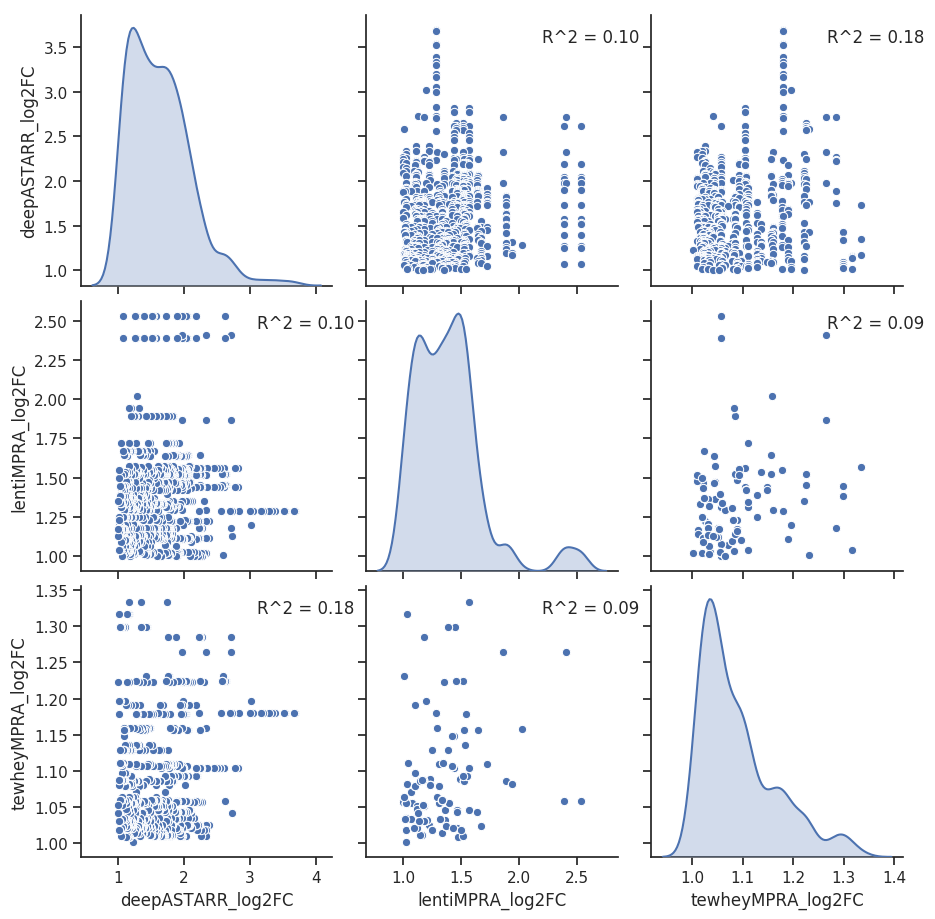

In [101]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "R^2" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(.7, .9), xycoords=ax.transAxes)

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(data=shared_peaks.loc[:, ['deepASTARR_log2FC','lentiMPRA_log2FC','tewheyMPRA_log2FC']],
            diag_kind="kde", height=3.0)
g.map_lower(corrfunc)
g.map_upper(corrfunc)
# g.fig.title("Correlation for %d shared elements" % shared_peaks.shape[0], y=1.08)
# g.fig.suptitle('512 unique deepASTARR peaks, 92 lentiMPRA peaks, 62 tewheyMPRA peaks')
sns.despine()


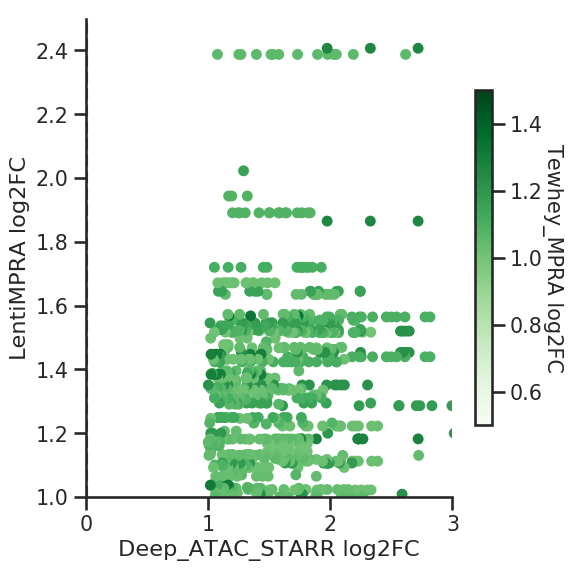

In [84]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import pearsonr, spearmanr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "\u03C1" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(1, 1), xycoords=ax.transAxes)
    
#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})

fig, ax = plt.subplots(1, 1)

points = ax.scatter(
    shared_peaks['deepASTARR_log2FC'], shared_peaks['lentiMPRA_log2FC'], c=shared_peaks['tewheyMPRA_log2FC'],
    cmap='Greens', marker='o', s=40)

# for x, y, t in zip(
#     RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_ATAC_log2FC'],
#     RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_RNA_log2FC'], 
#     RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'GeneName']) :
#     ax1.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=12)

# ax1.scatter(
#     RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_ATAC_log2FC'], 
#     RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_RNA_log2FC'],
#     c=RNA_ATAC_ASTARR_spGenes.loc[np.abs(RNA_ATAC_ASTARR_spGenes.distance)<3000, 'norm_ASTARR_log2FC'],
#     cmap='RdBu_r', marker='o', s=40)

# corrfunc(
#     RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)<3000, 'norm_ATAC_log2FC'], 
#     RNA_ATAC_ASTARR.loc[np.abs(RNA_ATAC_ASTARR.distance)<3000, 'norm_RNA_log2FC'],
#     ax=ax1, method='spearman')

ax.set_xlim(0,3)
ax.set_ylim(1,2.5)
ax.vlines(0, ax.get_ylim()[0], ax.get_ylim()[1], color='#5A5959', linestyle='--')
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color='#5A5959', linestyle='--')
ax.set_xlabel('Deep_ATAC_STARR log2FC')
ax.set_ylabel('LentiMPRA log2FC')


cbar = fig.colorbar(points, shrink=0.7, ax=ax)
cbar.set_label('Tewhey_MPRA log2FC', rotation=270, fontsize=15, labelpad=15)
cbar.mappable.set_clim(0.5,1.5)


sns.despine(fig,ax)
plt.tight_layout()
plt.show()

In [44]:
import pandas as pd

deep_atac_starr = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_atac_starr_orientation_dep_call_bin_all.bed', sep='\t',
                              names = ['chr','start','end','peak','log2FC','strand','enhancer','padj'])
lentiMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lenti_mpra_orientation_dep_call_all.bed', sep='\t',
                        names = ['chr','start','end','peak','log2FC','strand','enhancer','padj'])
Tewhey_MPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.sorted.bed', sep='\t',
                        names = ['chr','start','end','peak','log2FC','strand','enhancer','padj'])

Tewhey_MPRA[Tewhey_MPRA['enhancer']=='Inactive']


,chr,start,end,peak,log2FC,strand,enhancer,padj


In [45]:
lentiMPRA_GATA_MYC = lentiMPRA[((lentiMPRA['chr']=='chrX')&(lentiMPRA['start']>47786554)&(lentiMPRA['end']<49786554))|((lentiMPRA['chr']=='chr8')&(lentiMPRA['start']>126736069)&(lentiMPRA['end']<128736069))]
deep_atac_starr_GATA_MYC = deep_atac_starr[((deep_atac_starr['chr']=='chrX')&(deep_atac_starr['start']>47786554)&(deep_atac_starr['end']<49786554))|((deep_atac_starr['chr']=='chr8')&(deep_atac_starr['start']>126736069)&(deep_atac_starr['end']<128736069))]


lentiMPRA_GATA_MYC.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.bed', sep='\t', index=False, header=None)
deep_atac_starr_GATA_MYC.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC.bed', sep='\t', index=False, header=None)


In [67]:
### separate the GATA and MYC locus for the 3 assays

lentiMPRA_GATA = lentiMPRA[(lentiMPRA['chr']=='chrX')&(lentiMPRA['start']>47786554)&(lentiMPRA['end']<49786554)]
lentiMPRA_MYC = lentiMPRA[(lentiMPRA['chr']=='chr8')&(lentiMPRA['start']>126736069)&(lentiMPRA['end']<128736069)]

deep_ASTARR_GATA = deep_atac_starr[(deep_atac_starr['chr']=='chrX')&(deep_atac_starr['start']>47786554)&(deep_atac_starr['end']<49786554)]
deep_ASTARR_MYC = deep_atac_starr[(deep_atac_starr['chr']=='chr8')&(deep_atac_starr['start']>126736069)&(deep_atac_starr['end']<128736069)]

tewheyMPRA_GATA = Tewhey_MPRA[(Tewhey_MPRA['chr']=='chrX')&(Tewhey_MPRA['start']>47786554)&(Tewhey_MPRA['end']<49786554)]
tewheyMPRA_MYC = Tewhey_MPRA[(Tewhey_MPRA['chr']=='chr8')&(Tewhey_MPRA['start']>126736069)&(Tewhey_MPRA['end']<128736069)]


lentiMPRA_GATA.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA.bed', sep='\t', index=False, header=None)
lentiMPRA_MYC.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_MYC.bed', sep='\t', index=False, header=None)

deep_ASTARR_GATA.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA.bed', sep='\t', index=False, header=None)
deep_ASTARR_MYC.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_MYC.bed', sep='\t', index=False, header=None)

tewheyMPRA_GATA.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA.bed', sep='\t', index=False, header=None)
tewheyMPRA_MYC.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_MYC.bed', sep='\t', index=False, header=None)


In [75]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_tewheyMPRA_GATA_intersected_peaks.bed

In [78]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_tewheyMPRA_GATA_intersected_peaks.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_tewheyMPRA_ASTARR_GATA_intersected_peaks.bed


In [35]:
lenti_top10 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(7)
deep_ASTARR_top10 = deep_atac_starr_GATA_MYC.sort_values(by='log2FC', ascending=False).head(58)
Tewhey_MPRA_top10 = Tewhey_MPRA.sort_values(by='log2FC', ascending=False).head(9470)

lenti_top10[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top10%.bed', sep='\t', index=False, header=None)
deep_ASTARR_top10[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top10%.bed', sep='\t', index=False, header=None)
Tewhey_MPRA_top10[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top10%.bed', sep='\t', index=False, header=None)


In [80]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top10%.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top10%.bed \
-wa -wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_GATA_MYC_top10%.intersected_peaks.txt


In [81]:
%%bash
cat /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_GATA_MYC_top10%.intersected_peaks.txt \
| awk -vOFS='\t' '{print $1, $2<$6?$2:$6, $3<$7?$3:$7, $0}' \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_GATA_MYC_top10%.intersected_peaks.bed


In [84]:
import pandas as pd

lentiMPRA_ASTARR = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_GATA_MYC_top10%.intersected_peaks.bed', sep='\t',
                               names=['chr','start','end','chr_1','str_1','end_1','logFC1','chr2','str2','end2','logFC2'])
lentiMPRA_ASTARR[['chr','start','end','logFC1','logFC2']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_GATA_MYC_top10%.intersected_peaks_annotated.bed', sep='\t', index=None, header=False)


In [86]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_GATA_MYC_top10%.intersected_peaks_annotated.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top10%.bed \
-wa -wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_TewheyMPRA_GATA_MYC_top10%.intersected_peaks.bed


In [18]:
import pandas as pd

intersected_peaks = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_TewheyMPRA_GATA_MYC_top10%.intersected_peaks.bed', sep='\t',
                                names=['chr','start','end','lentiMPRA_log2FC','deepASTARR_log2FC','chr1','str2','end2','tewheyMPRA_log2FC'])

intersected_peaks[['lentiMPRA_log2FC','deepASTARR_log2FC','tewheyMPRA_log2FC']].describe()
intersected_peaks

,chr,start,end,lentiMPRA_log2FC,deepASTARR_log2FC,chr1,str2,end2,tewheyMPRA_log2FC
0,chr8,128428050,128428300,1.934208,3.019050,chr8,128428126,128428325,5.136301
1,chr8,128428050,128428300,1.934208,3.019050,chr8,128428151,128428350,5.094159
2,chr8,128428050,128428300,1.934208,3.019050,chr8,128428201,128428400,5.031526
3,chr8,128428050,128428300,1.934208,3.019050,chr8,128428176,128428375,4.767067
4,chr8,128428050,128428300,1.934208,3.019050,chr8,128428226,128428425,4.435306
5,chr8,128428050,128428300,1.934208,3.019050,chr8,128428251,128428450,3.753544
6,chr8,128428050,128428300,1.934208,3.019050,chr8,128428276,128428475,3.696616
7,chr8,128428050,128428300,1.934208,3.019050,chr8,128428101,128428300,2.278718
8,chr8,128428050,128428300,1.934208,3.019050,chr8,128428076,128428275,1.949878
9,chr8,128428100,128428350,1.934208,2.782747,chr8,128428126,128428325,5.136301


In [93]:
##### deep_atac_starr: min=2.55, max=3.93
##### lentiMPRA: min=1.61, max=1.93
##### Tewhey_MPRA: min=1.94, max=5.32

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


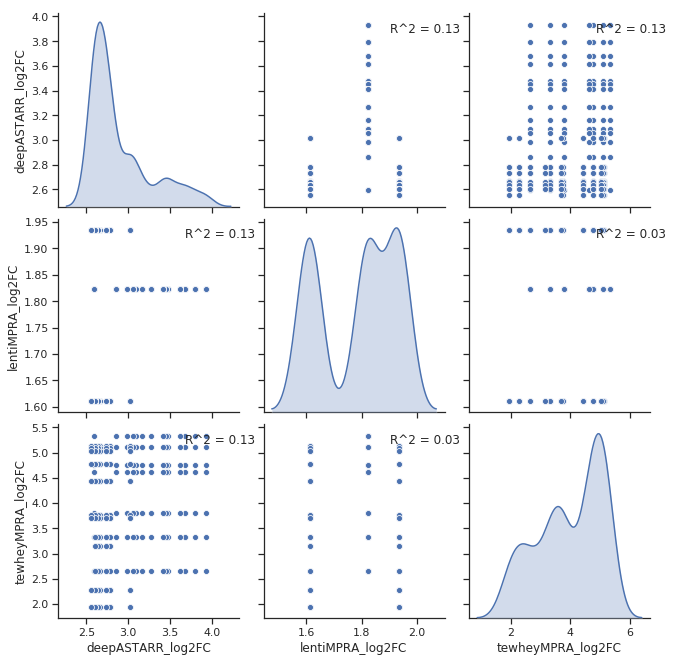

In [91]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 
import seaborn as sns

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "R^2" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(.7, .9), xycoords=ax.transAxes)

sns.set(style="ticks", color_codes=True)

g = sns.pairplot(data=intersected_peaks.loc[:, ['deepASTARR_log2FC','lentiMPRA_log2FC','tewheyMPRA_log2FC']],
            diag_kind="kde", height=3.0)
g.map_lower(corrfunc)
g.map_upper(corrfunc)
# g.fig.title("Correlation for %d shared elements" % shared_peaks.shape[0], y=1.08)
# g.fig.suptitle('512 unique deepASTARR peaks, 92 lentiMPRA peaks, 62 tewheyMPRA peaks')
sns.despine()


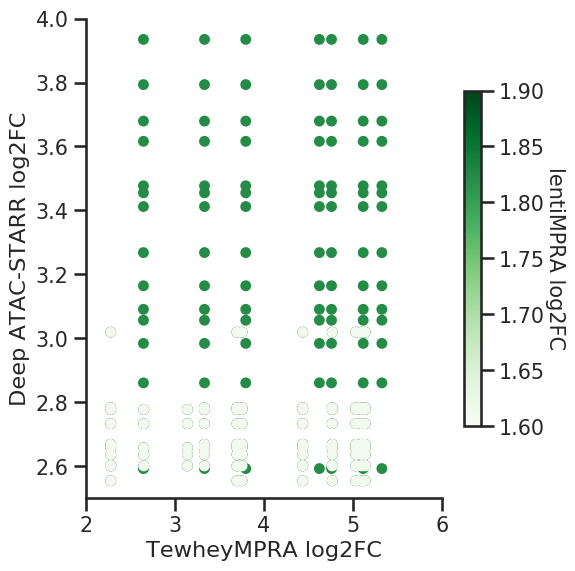

In [6]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.stats import pearsonr, spearmanr

intersected_peaks = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_ASTARR_TewheyMPRA_GATA_MYC_top10%.intersected_peaks.bed', sep='\t',
                                names=['chr','start','end','lentiMPRA_log2FC','deepASTARR_log2FC','chr1','str2','end2','tewheyMPRA_log2FC'])

#plt.rcParams['pdf.fonttype'] = 42
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.9)
plt.rcParams.update({'figure.figsize':(6,6), 'figure.dpi':100})

fig, ax = plt.subplots(1, 1)

points = ax.scatter(
    intersected_peaks['tewheyMPRA_log2FC'], intersected_peaks['deepASTARR_log2FC'], c=intersected_peaks['lentiMPRA_log2FC'],
    cmap='Greens', marker='o', s=40)


ax.set_xlim(2,6)
ax.set_ylim(2.5,4)
ax.vlines(0, ax.get_ylim()[0], ax.get_ylim()[1], color='#5A5959', linestyle='--')
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], color='#5A5959', linestyle='--')
ax.set_xlabel('TewheyMPRA log2FC')
ax.set_ylabel('Deep ATAC-STARR log2FC')


cbar = fig.colorbar(points, shrink=0.7, ax=ax)
cbar.set_label('lentiMPRA log2FC', rotation=270, fontsize=15, labelpad=15)
cbar.mappable.set_clim(1.6,1.9)


sns.despine(fig,ax)
plt.tight_layout()
plt.show()

### Find the jaccard index for the top10, top20, top50, top100 peaks 

In [46]:
lenti_top10 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(10)
deep_ASTARR_top10 = deep_atac_starr_GATA_MYC.sort_values(by='log2FC', ascending=False).head(10)
Tewhey_MPRA_top10 = Tewhey_MPRA.sort_values(by='log2FC', ascending=False).head(10)

lenti_top10[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top10.bed', sep='\t', index=False, header=None)
deep_ASTARR_top10[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top10.bed', sep='\t', index=False, header=None)
Tewhey_MPRA_top10[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top10.bed', sep='\t', index=False, header=None)


lenti_top20 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(20)
deep_ASTARR_top20 = deep_atac_starr_GATA_MYC.sort_values(by='log2FC', ascending=False).head(20)
Tewhey_MPRA_top20 = Tewhey_MPRA.sort_values(by='log2FC', ascending=False).head(20)

lenti_top20[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top20.bed', sep='\t', index=False, header=None)
deep_ASTARR_top20[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top20.bed', sep='\t', index=False, header=None)
Tewhey_MPRA_top20[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top20.bed', sep='\t', index=False, header=None)


lenti_top30 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(30)
deep_ASTARR_top30 = deep_atac_starr_GATA_MYC.sort_values(by='log2FC', ascending=False).head(30)
Tewhey_MPRA_top30 = Tewhey_MPRA.sort_values(by='log2FC', ascending=False).head(30)

lenti_top30[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top30.bed', sep='\t', index=False, header=None)
deep_ASTARR_top30[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top30.bed', sep='\t', index=False, header=None)
Tewhey_MPRA_top30[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top30.bed', sep='\t', index=False, header=None)


lenti_top50 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(50)
deep_ASTARR_top50 = deep_atac_starr_GATA_MYC.sort_values(by='log2FC', ascending=False).head(50)
Tewhey_MPRA_top50 = Tewhey_MPRA.sort_values(by='log2FC', ascending=False).head(50)

lenti_top50[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top50.bed', sep='\t', index=False, header=None)
deep_ASTARR_top50[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top50.bed', sep='\t', index=False, header=None)
Tewhey_MPRA_top50[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top50.bed', sep='\t', index=False, header=None)

# lenti_top80 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(64)
deep_ASTARR_top100 = deep_atac_starr_GATA_MYC.sort_values(by='log2FC', ascending=False).head(64)
Tewhey_MPRA_top100 = Tewhey_MPRA.sort_values(by='log2FC', ascending=False).head(64)

# lenti_top80[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_64.bed', sep='\t', index=False, header=None)
deep_ASTARR_top100[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top64.bed', sep='\t', index=False, header=None)
Tewhey_MPRA_top100[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top64.bed', sep='\t', index=False, header=None)


# lenti_top80 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(64)
deep_ASTARR_top100 = deep_atac_starr_GATA_MYC.sort_values(by='log2FC', ascending=False).head(100)
Tewhey_MPRA_top100 = Tewhey_MPRA.sort_values(by='log2FC', ascending=False).head(100)

# lenti_top80[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_64.bed', sep='\t', index=False, header=None)
deep_ASTARR_top100[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top100.bed', sep='\t', index=False, header=None)
Tewhey_MPRA_top100[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top100.bed', sep='\t', index=False, header=None)

# lenti_top80 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(64)
deep_ASTARR_top200 = deep_atac_starr_GATA_MYC.sort_values(by='log2FC', ascending=False).head(200)
Tewhey_MPRA_top200 = Tewhey_MPRA.sort_values(by='log2FC', ascending=False).head(200)

# lenti_top80[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_64.bed', sep='\t', index=False, header=None)
deep_ASTARR_top200[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top200.bed', sep='\t', index=False, header=None)
Tewhey_MPRA_top200[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top200.bed', sep='\t', index=False, header=None)


In [47]:
%%bash
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top10.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top10.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top20.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top20.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top30.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top30.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top50.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top50.sorted.bed
# sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top80%.bed \
# > /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top80%.sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top10.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top10.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top20.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top20.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top30.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top30.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top50.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top50.sorted.bed
# sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top80%.bed \
# > /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top80%.sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top10.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top10.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top20.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top20.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top30.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top30.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top50.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top50.sorted.bed
# sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top80%.bed \
# > /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top80%.sorted.bed

# sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.bed \
# > /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.sorted.bed 
# sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC.bed \
# > /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC.sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top64.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top64.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top100.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top100.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top200.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top200.sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top64.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top64.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top100.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top100.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top200.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top200.sorted.bed

In [62]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top50.sorted.bed  \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top50.sorted.bed \


intersection	union-intersection	jaccard	n_intersections
592	11996	0.0493498	3


In [63]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_top50.sorted.bed  \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top50.sorted.bed \


intersection	union-intersection	jaccard	n_intersections
1083	10759	0.10066	7


In [64]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/tewheyMPRA_GATA_MYC_top50.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC_top50.sorted.bed \


intersection	union-intersection	jaccard	n_intersections
199	7855	0.0253342	1


   percent  lentiMPRA_ASTARR  lentiMPRA_tewheyMPRA  tewheyMPRA_ASTARR
0       10           0.06837               0.01080            0.00539
1       20           0.03433               0.00146            0.00561
2       30           0.03433               0.00146            0.00672
3       50           0.01547               0.00165            0.00763
4       80           0.01547               0.00165            0.00763
5      100           0.04870               0.00260            0.01141


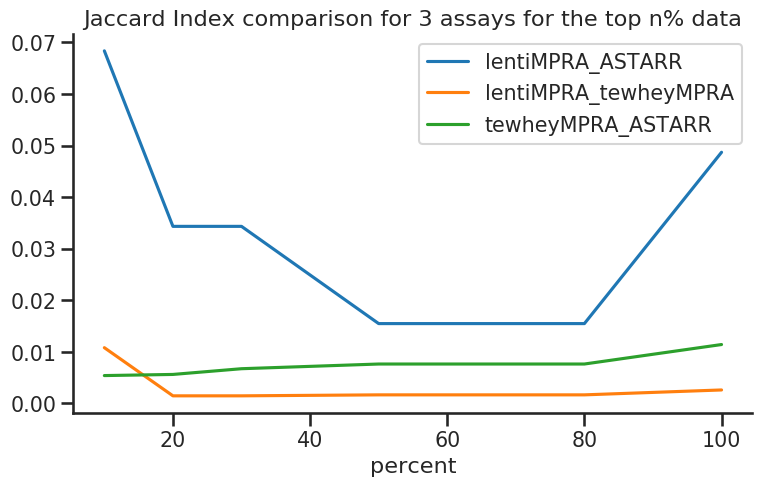

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = [[10,0.06837,0.0108,0.00539],[20,0.03433,0.00146,0.00561],[30,0.03433,0.00146,0.00672],[50,0.01547,0.00165,0.00763],[80,0.01547,0.00165,0.00763],[100,0.04870,0.00260,0.01141]]
jaccard_index_percent = pd.DataFrame(data, columns=['percent','lentiMPRA_ASTARR','lentiMPRA_tewheyMPRA','tewheyMPRA_ASTARR'])
print(jaccard_index_percent)

jaccard_index_percent.set_index('percent').plot(figsize=(8,5))

sns.despine()
plt.tight_layout()
plt.title('Jaccard Index comparison for 3 assays for the top n% data')
plt.show()


   number of peaks  lentiMPRA_ASTARR  lentiMPRA_tewheyMPRA  tewheyMPRA_ASTARR
0               10            0.0850                0.0000             0.0000
1               20            0.0580                0.0240             0.0530
2               30            0.0530                0.0310             0.0360
3               50            0.0493                0.1006             0.0250
4               64            0.0710                0.1500             0.0414
5              100            0.0000                0.0000             0.0340
6              200            0.0000                0.0000             0.0740


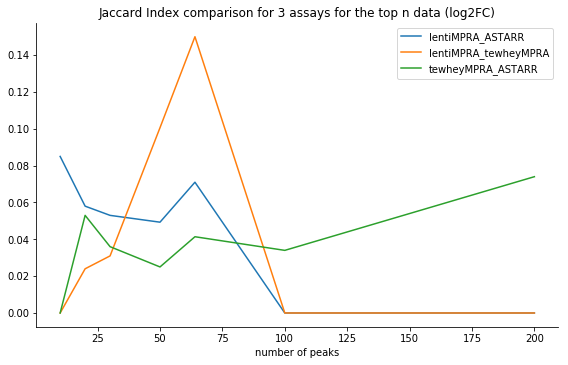

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = [[10,0.085,0,0],[20,0.058,0.024,0.053],[30,0.053,0.031,0.036],[50,0.0493,0.1006,0.025],[64,0.071,0.15,0.0414],[100,0,0,0.034],[200,0,0,0.074]]
jaccard_index_num = pd.DataFrame(data, columns=['number of peaks','lentiMPRA_ASTARR','lentiMPRA_tewheyMPRA','tewheyMPRA_ASTARR'])
print(jaccard_index_num)

jaccard_index_num.set_index('number of peaks').plot(figsize=(8,5))

sns.despine()
plt.tight_layout()
plt.title('Jaccard Index comparison for 3 assays for the top n data (log2FC)')
plt.show()


## Compare the 3 assays based on the padj value

In [17]:
!mkdir -p /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj


- /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_atac_starr_orientation_dep_call_bin_all.sorted.bed
- /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lenti_mpra_orientation_dep_call_all.sorted.bed
- /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.sorted.bed


In [10]:
%%bash
wc -l /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC.bed
wc -l /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.bed
wc -l /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.sorted.bed


575 /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC.bed
64 /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.bed
14396 /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.sorted.bed


In [12]:
import pandas as pd

lentiMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.bed', sep='\t',
                        names=['chr','start','end','peak','log2FC','strand','enhancer','padj'])
tewheyMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.sorted.bed', sep='\t',
                        names=['chr','start','end','peak','log2FC','strand','enhancer','padj'])
deep_ASTARR = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC.bed', sep='\t',
                        names=['chr','start','end','peak','log2FC','strand','enhancer','padj'])

lentiMPRA.sort_values(by='padj').head(10)


,chr,start,end,peak,log2FC,strand,enhancer,padj
53,chrX,48937100,48937300,peak86188_Reversed:,1.359905,-,Enhancer,2.312687e-53
61,chrX,49191051,49191251,peak86206,1.676287,+,Enhancer,2.315102e-50
13,chrX,48521642,48521842,ENSG00000147155_Reversed:,1.415620,-,Enhancer,4.713336e-49
60,chrX,49175554,49175754,peak86205_Reversed:,1.308902,-,Enhancer,2.058870e-47
14,chrX,49079831,49080031,ENSG00000196998_Reversed:,1.306690,+,Enhancer,2.195771e-41
58,chrX,49039929,49040129,peak86196_Reversed:,1.183891,-,Enhancer,2.272959e-40
37,chr8,128049237,128049437,peak81283,1.330492,+,Enhancer,8.653540e-40
34,chr8,126805067,126805267,peak81211_Reversed:,1.339654,-,Enhancer,1.406832e-37
45,chrX,48433873,48434073,peak86154,1.137330,+,Enhancer,1.678865e-37
6,chrX,49235320,49235520,ENSG00000101997,1.200218,+,Enhancer,1.075562e-36


In [18]:
lenti_top10 = lentiMPRA.sort_values(by='padj', ascending=False).head(10)
deep_ASTARR_top10 = deep_ASTARR.sort_values(by='padj', ascending=False).head(10)
tewheyMPRA_top10 = tewheyMPRA.sort_values(by='padj', ascending=False).head(10)

lenti_top10[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top10.bed', sep='\t', index=False, header=None)
deep_ASTARR_top10[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top10.bed', sep='\t', index=False, header=None)
tewheyMPRA_top10[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top10.bed', sep='\t', index=False, header=None)


lenti_top20 = lentiMPRA.sort_values(by='padj', ascending=False).head(20)
deep_ASTARR_top20 = deep_atac_starr.sort_values(by='padj', ascending=False).head(20)
tewheyMPRA_top20 = tewheyMPRA.sort_values(by='padj', ascending=False).head(20)

lenti_top20[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top20.bed', sep='\t', index=False, header=None)
deep_ASTARR_top20[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top20.bed', sep='\t', index=False, header=None)
tewheyMPRA_top20[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top20.bed', sep='\t', index=False, header=None)


lenti_top30 = lentiMPRA.sort_values(by='padj', ascending=False).head(30)
deep_ASTARR_top30 = deep_atac_starr.sort_values(by='padj', ascending=False).head(30)
tewheyMPRA_top30 = tewheyMPRA.sort_values(by='padj', ascending=False).head(30)

lenti_top30[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top30.bed', sep='\t', index=False, header=None)
deep_ASTARR_top30[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top30.bed', sep='\t', index=False, header=None)
tewheyMPRA_top30[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top30.bed', sep='\t', index=False, header=None)


lenti_top50 = lentiMPRA_GATA_MYC.sort_values(by='padj', ascending=False).head(50)
deep_ASTARR_top50 = deep_atac_starr_GATA_MYC.sort_values(by='padj', ascending=False).head(50)
tewheyMPRA_top50 = tewheyMPRA.sort_values(by='padj', ascending=False).head(50)

lenti_top50[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top50.bed', sep='\t', index=False, header=None)
deep_ASTARR_top50[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top50.bed', sep='\t', index=False, header=None)
tewheyMPRA_top50[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top50.bed', sep='\t', index=False, header=None)

# lenti_top80 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(64)
deep_ASTARR_top64 = deep_atac_starr_GATA_MYC.sort_values(by='padj', ascending=False).head(64)
tewheyMPRA_top64 = tewheyMPRA.sort_values(by='padj', ascending=False).head(64)

# lenti_top80[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_64.bed', sep='\t', index=False, header=None)
deep_ASTARR_top64[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top64.bed', sep='\t', index=False, header=None)
tewheyMPRA_top64[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top64.bed', sep='\t', index=False, header=None)


# lenti_top80 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(64)
deep_ASTARR_top100 = deep_atac_starr_GATA_MYC.sort_values(by='padj', ascending=False).head(100)
tewheyMPRA_top100 = tewheyMPRA.sort_values(by='padj', ascending=False).head(100)

# lenti_top80[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_64.bed', sep='\t', index=False, header=None)
deep_ASTARR_top100[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top100.bed', sep='\t', index=False, header=None)
tewheyMPRA_top100[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top100.bed', sep='\t', index=False, header=None)

# lenti_top80 = lentiMPRA_GATA_MYC.sort_values(by='log2FC', ascending=False).head(64)
deep_ASTARR_top200 = deep_atac_starr_GATA_MYC.sort_values(by='padj', ascending=False).head(200)
tewheyMPRA_top200 = tewheyMPRA.sort_values(by='padj', ascending=False).head(200)

# lenti_top80[['chr','start','end','log2FC']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC_64.bed', sep='\t', index=False, header=None)
deep_ASTARR_top200[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top200.bed', sep='\t', index=False, header=None)
tewheyMPRA_top200[['chr','start','end','padj']].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top200.bed', sep='\t', index=False, header=None)


In [97]:
lentiMPRA.sort_values(by='padj', ascending=False)

,chr,start,end,peak,log2FC,strand,enhancer,padj
12873,chr3,185753442,185753642,peak58359_Reversed:,1.041782,-,Enhancer,4.986121e-02
7488,chr12,75844189,75844389,peak20848,1.163016,+,Enhancer,4.957909e-02
5998,chr11,33095816,33096016,LMO2_1131_Reversed:,1.051482,-,Enhancer,4.896510e-02
13364,chr4,168475819,168476019,peak62311_Reversed:,1.285579,-,Enhancer,4.830101e-02
14916,chr7,76235221,76235421,peak75057_Reversed:,1.276027,-,Enhancer,4.771182e-02
9328,chr17,15893428,15893628,peak32975_Reversed:,1.171373,-,Enhancer,4.654264e-02
3924,chr3,53255889,53256089,ENSG00000163931,1.075761,-,Enhancer,4.633939e-02
4556,chrX,19082622,19082822,ENSG00000173698,1.187312,-,Enhancer,4.622596e-02
6182,chr10,24912319,24912519,peak10900_Reversed:,1.007749,-,Enhancer,4.600920e-02
14480,chr6,150492597,150492797,peak72069,1.144769,+,Enhancer,4.597164e-02


In [19]:
%%bash
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top10.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top10.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top20.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top20.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top30.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top30.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top50.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top50.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.sorted.bed


sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top10.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top10.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top20.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top20.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top30.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top30.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top50.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top50.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top64.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top64.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top100.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top100.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top200.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top200.sorted.bed



sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top10.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top10.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top20.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top20.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top30.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top30.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top50.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top50.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top64.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top64.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top100.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top100.sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top200.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top200.sorted.bed


In [37]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top50.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top50.sorted.bed \


intersection	union-intersection	jaccard	n_intersections
200	18838	0.0106168	1


In [38]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/lentiMPRA_GATA_MYC_top50.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top50.sorted.bed \


intersection	union-intersection	jaccard	n_intersections
0	18209	0	0


In [41]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/tewheyMPRA_GATA_MYC_top200.sorted.bed  \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/padj/deep_ASTARR_GATA_MYC_top200.sorted.bed \


intersection	union-intersection	jaccard	n_intersections
557	64295	0.00866319	4


In [24]:
!cat /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.bed

chrX	48539603	48539803	ENSG00000068354_Reversed:	1.10162848006123	-	Enhancer	1.95245825643126e-18
chrX	48476108	48476308	ENSG00000068438_Reversed:	1.0754661990985401	-	Enhancer	2.5478699657387705e-23
chrX	48597362	48597562	ENSG00000101940	1.30353463343865	+	Enhancer	2.3566512952728497e-19
chrX	48597362	48597562	ENSG00000101940_Reversed:	1.06228170454466	-	Enhancer	9.51831026039764e-27
chrX	48696549	48696749	ENSG00000101945	1.4951280425368703	+	Enhancer	1.58607994626507e-36
chrX	48696549	48696749	ENSG00000101945_Reversed:	1.15470510688321	-	Enhancer	4.16684974792973e-22
chrX	49235320	49235520	ENSG00000101997	1.20021811829476	+	Enhancer	1.0755619407641e-36
chrX	48911603	48911803	ENSG00000102100	1.06596243405605	-	Enhancer	2.6298652153951697e-22
chrX	48574416	48574616	ENSG00000102317	1.11798817473014	+	Enhancer	6.4998947875438904e-21
chrX	48574416	48574616	ENSG00000102317_Reversed:	1.46795636839016	-	Enhancer	7.441186228334759e-17
chrX	48003971	48004172	ENSG00000147118	1.2248914249040401	

   number of peaks  lentiMPRA_ASTARR  lentiMPRA_tewheyMPRA  tewheyMPRA_ASTARR
0               10            0.0000                     0            0.00000
1               20            0.0000                     0            0.00000
2               30            0.0000                     0            0.00000
3               50            0.0106                     0            0.00730
4               64            0.0086                     0            0.00580
5              100            0.0000                     0            0.00930
6              200            0.0000                     0            0.00866


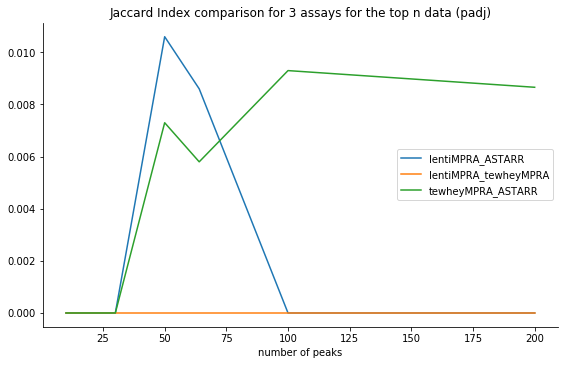

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = [[10,0,0,0],[20,0,0,0],[30,0,0,0],[50,0.0106,0,0.0073],[64,0.0086,0,0.0058],[100,0,0,0.0093],[200,0,0,0.00866]]
jaccard_index_num = pd.DataFrame(data, columns=['number of peaks','lentiMPRA_ASTARR','lentiMPRA_tewheyMPRA','tewheyMPRA_ASTARR'])
print(jaccard_index_num)

jaccard_index_num.set_index('number of peaks').plot(figsize=(8,5))

sns.despine()
plt.tight_layout()
plt.title('Jaccard Index comparison for 3 assays for the top n data (padj)')
plt.show()


In [8]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra
module load bedtools2
bedtools merge -i tewhey_mpra_orientation_dep_call_all_significant.sorted.bed -c 5 -o max \
> tewhey_mpra_orientation_dep_call_all_significant.merged.sorted.bed

In [18]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.merged.sorted.bed

4052 /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.merged.sorted.bed


In [16]:
%%bash
module load bedtools2
bedtools merge \
-i /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/lentiMPRA_GATA_MYC.sorted.bed -c 5 -o max \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed

In [17]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed

49 /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed


In [19]:
%%bash
module load bedtools2
bedtools merge \
-i /data/reddylab/Revathy/collabs/Jamborees/03152022/data/orientation_dep/deep_ASTARR_GATA_MYC.sorted.bed -c 5 -o max \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed

In [20]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed

115 /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed


In [21]:
!head /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed

chr8	126779300	126779550	1.113478661
chr8	126805650	126805900	1.441506436
chr8	126823800	126824250	1.792189048
chr8	127252000	127252250	1.823749433
chr8	127567050	127567600	1.759139403
chr8	127618300	127618800	4.084231831
chr8	127625200	127625500	2.190471318
chr8	127676700	127677050	1.988168934
chr8	127735750	127736000	1.078658717
chr8	127742750	127743050	1.906469262


In [33]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.merged.sorted.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_merged.sorted.bed


In [34]:
!head /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_merged.sorted.bed

chr8	126805067	126805267	1.339654312	chr8	126804901	126805400	5.922036218
chr8	126985869	126986069	1.058626977	chr8	126985751	126986200	5.442699341
chr8	127089669	127089869	1.264245139	chr8	127089551	127089900	3.069093362
chr8	127097069	127097269	1.410060299	chr8	127097001	127097350	6.269295775
chr8	127272669	127272869	1.376793994	chr8	127272451	127273100	6.072041491
chr8	127898840	127899040	1.02109927	chr8	127898651	127899150	7.776400782
chr8	128002550	128002750	1.169029292	chr8	128002426	128003000	3.740581549
chr8	128049237	128049437	1.330492279	chr8	128048426	128049525	5.675175731
chr8	128176938	128177138	1.82276153	chr8	128176701	128177525	5.323956695
chr8	128344040	128344240	1.125826863	chr8	128343901	128344450	6.616175046


In [35]:
%%bash
cat /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_merged.sorted.bed \
| awk -vOFS='\t' '{print $1, $2<$6?$2:$6, $3<$7?$3:$7, $0}' \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_merged.corrected.sorted.bed


In [37]:
!head /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_merged.corrected.sorted.bed

chr8	126804901	126805267	chr8	126805067	126805267	1.339654312	chr8	126804901	126805400	5.922036218
chr8	126985751	126986069	chr8	126985869	126986069	1.058626977	chr8	126985751	126986200	5.442699341
chr8	127089551	127089869	chr8	127089669	127089869	1.264245139	chr8	127089551	127089900	3.069093362
chr8	127097001	127097269	chr8	127097069	127097269	1.410060299	chr8	127097001	127097350	6.269295775
chr8	127272451	127272869	chr8	127272669	127272869	1.376793994	chr8	127272451	127273100	6.072041491
chr8	127898651	127899040	chr8	127898840	127899040	1.02109927	chr8	127898651	127899150	7.776400782
chr8	128002426	128002750	chr8	128002550	128002750	1.169029292	chr8	128002426	128003000	3.740581549
chr8	128048426	128049437	chr8	128049237	128049437	1.330492279	chr8	128048426	128049525	5.675175731
chr8	128176701	128177138	chr8	128176938	128177138	1.82276153	chr8	128176701	128177525	5.323956695
chr8	128343901	128344240	chr8	128344040	128344240	1.125826863	chr8	128343901	128344450	6.616175046


In [40]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_merged.corrected.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_deepASTARR_GATA_MYC_merged.sorted.bed

In [41]:
!head /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_deepASTARR_GATA_MYC_merged.sorted.bed

chr8	127898651	127899040	chr8	127898840	127899040	1.02109927	chr8	127898651	127899150	7.776400782	chr8	127898550	127899650	3.119624426
chr8	128002426	128002750	chr8	128002550	128002750	1.169029292	chr8	128002426	128003000	3.740581549	chr8	128002500	128003100	2.573476242
chr8	128048426	128049437	chr8	128049237	128049437	1.330492279	chr8	128048426	128049525	5.675175731	chr8	128048300	128049050	2.728805723
chr8	128176701	128177138	chr8	128176938	128177138	1.82276153	chr8	128176701	128177525	5.323956695	chr8	128176700	128177450	3.93493356
chr8	128428001	128428394	chr8	128428194	128428394	1.934207845	chr8	128428001	128428825	5.136300869	chr8	128427950	128428700	3.019050415
chrX	47836501	47836901	chrX	47836701	47836901	1.195900704	chrX	47836501	47837300	7.730264392	chrX	47836500	47837050	1.85155506
chrX	48003801	48004172	chrX	48003971	48004172	1.224891425	chrX	48003801	48004300	7.480345662	chrX	48003950	48004200	1.171173442
chrX	48475661	48476308	chrX	48476108	48476308	1.075466199	chrX	48475

In [ ]:
import pandas as pd

intersected_peaks = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_deepASTARR_GATA_MYC_merged.sorted.bed', sep='\t',
                                names=['chr','start','end','lentiMPRA_chr','lentiMPRA_start','lentiMPRA_end','lentiMPRA_log2FC',
                                       'tewheyMPRA_chr','tewheyMPRA_start','tewheyMPRA_end','tewheyMPRA_log2FC',
                                       'deepASTARR_chr','deepASTARR_start','deepASTARR_end','deepASTARR_log2FC'])
intersected_peaks

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


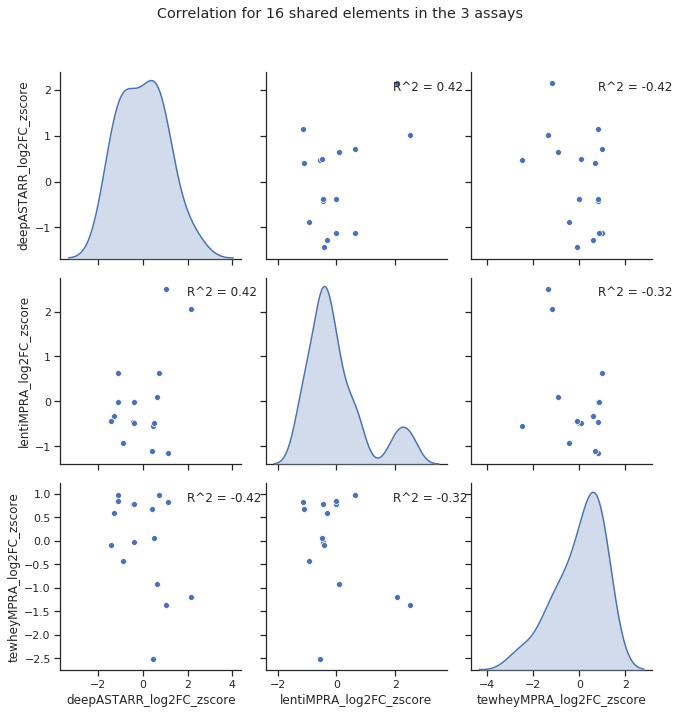

In [2]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "R^2" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(.7, .9), xycoords=ax.transAxes)

sns.set(style="ticks", color_codes=True)

intersected_peaks = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_deepASTARR_GATA_MYC_merged.sorted.bed', sep='\t',
                                names=['chr','start','end','lentiMPRA_chr','lentiMPRA_start','lentiMPRA_end','lentiMPRA_log2FC',
                                       'tewheyMPRA_chr','tewheyMPRA_start','tewheyMPRA_end','tewheyMPRA_log2FC',
                                       'deepASTARR_chr','deepASTARR_start','deepASTARR_end','deepASTARR_log2FC'])

peak_logFC = intersected_peaks[['lentiMPRA_log2FC','deepASTARR_log2FC','tewheyMPRA_log2FC']]
cols = list(peak_logFC.columns)
for col in cols:
    col_zscore = col + '_zscore'
    peak_logFC[col_zscore] = (peak_logFC[col] - peak_logFC[col].mean())/peak_logFC[col].std(ddof=0)


g = sns.pairplot(data=peak_logFC.loc[:, ['deepASTARR_log2FC_zscore','lentiMPRA_log2FC_zscore','tewheyMPRA_log2FC_zscore']],
            diag_kind="kde", height=3.0)
g.map_lower(corrfunc)
g.map_upper(corrfunc)
g.fig.suptitle("Correlation for %d shared elements in the 3 assays" % intersected_peaks.shape[0], y=1.08)
# g.fig.suptitle('512 unique deepASTARR peaks, 92 lentiMPRA peaks, 62 tewheyMPRA peaks')
sns.despine()
plt.show()


In [4]:
import pandas as pd

lentiMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed',sep='\t',
                        names=['chr','start','end','log2FC'])
lentiMPRA.sort_values(by='log2FC', ascending=False)[:40].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA_MYC.top40.merged.sorted.bed', sep='\t', header=None, index=False)

In [32]:
tewheyMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.merged.sorted.bed', sep='\t',
                         names=['chr','start','end','log2FC'])
tewheyMPRA.sort_values(by='log2FC', ascending=False)[:115].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top115.merged.sorted.bed', sep='\t', header=None, index=False)


In [15]:
deepASTARR = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed', sep='\t',
                        names=['chr','start','end','log2FC'])
deepASTARR.sort_values(by='log2FC', ascending=False)[:100].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top100.merged.sorted.bed', sep='\t', header=None, index=False)

In [86]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA_MYC.top40.merged.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top40.merged.sorted.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_top40.bed 

In [87]:
%%bash
cat /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_top40.bed  \
| awk -vOFS='\t' '{print $1, $2<$6?$2:$6, $3<$7?$3:$7, $0}' \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_top40.corrected.bed 


In [88]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_GATA_MYC_top40.corrected.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top40.merged.sorted.bed \
-wa \
-wb \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_deepASTARR_GATA_MYC_top40.bed 

In [89]:
!cat /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_deepASTARR_GATA_MYC_top40.bed 

chrX	48574131	48574616	chrX	48574416	48574616	1.467956368	chrX	48574131	48575350	7.961804086	chrX	48574450	48575250	2.766874273
chrX	49148681	49148992	chrX	49148792	49148992	1.189823738	chrX	49148681	49149200	6.858205745	chrX	49148600	49149250	2.598620195


/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/scipy/stats/stats.py:3013: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


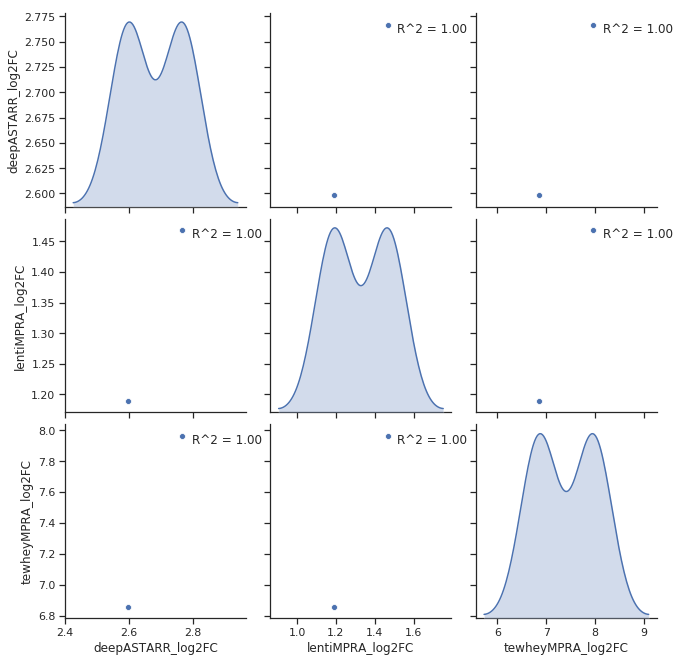

In [90]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = "R^2" # u'\u03C1'
    ax.annotate('%s = %.2f' % (rho, r), xy=(.7, .9), xycoords=ax.transAxes)

sns.set(style="ticks", color_codes=True)

intersected_peaks = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_tewheyMPRA_deepASTARR_GATA_MYC_top40.bed', sep='\t',
                                names=['chr','start','end','lentiMPRA_chr','lentiMPRA_start','lentiMPRA_end','lentiMPRA_log2FC',
                                       'tewheyMPRA_chr','tewheyMPRA_start','tewheyMPRA_end','tewheyMPRA_log2FC',
                                       'deepASTARR_chr','deepASTARR_start','deepASTARR_end','deepASTARR_log2FC'])

g = sns.pairplot(data=intersected_peaks.loc[:, ['deepASTARR_log2FC','lentiMPRA_log2FC','tewheyMPRA_log2FC']],
            diag_kind="kde", height=3.0)
g.map_lower(corrfunc)
g.map_upper(corrfunc)
# g.fig.title("Correlation for %d shared elements" % shared_peaks.shape[0], y=1.08)
# g.fig.suptitle('512 unique deepASTARR peaks, 92 lentiMPRA peaks, 62 tewheyMPRA peaks')
sns.despine()
plt.show()


In [33]:
%%bash
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA_MYC.top20.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA_MYC.top20.merged.Sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top20.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top20.merged.Sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top20.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top20.merged.Sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA_MYC.top30.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA_MYC.top30.merged.Sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top30.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top30.merged.Sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top30.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top30.merged.Sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA_MYC.top40.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA_MYC.top40.merged.Sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top40.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top40.merged.Sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top40.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top40.merged.Sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top49.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top49.merged.Sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top49.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top49.merged.Sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top100.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top100.merged.Sorted.bed
sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top100.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top100.merged.Sorted.bed

sort -k1,1 -k2,2n /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top115.merged.sorted.bed \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top115.merged.Sorted.bed

In [25]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top49.merged.Sorted.bed \


intersection	union-intersection	jaccard	n_intersections
4397	49682	0.0885029	21


In [26]:
%%bash
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top49.merged.Sorted.bed \


intersection	union-intersection	jaccard	n_intersections
1966	30822	0.0637856	10


In [34]:
%%bash
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA_MYC.top115.merged.Sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed \

intersection	union-intersection	jaccard	n_intersections
15029	119061	0.126229	37


   num of peaks  lentiMPRA_tewheyMPRA  lentiMPRA_ASTARR  tewheyMPRA_ASTARR
0            20                 0.016            0.0380             0.0580
1            30                 0.040            0.0370             0.0680
2            40                 0.071            0.0366             0.0740
3            49                 0.088            0.0630             0.0870
4           100                 0.000            0.0000             0.1062
5           115                 0.000            0.0000             0.1262


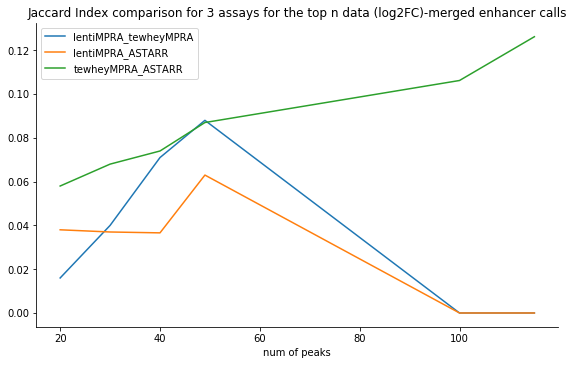

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = [[20,0.016,0.038,0.058],[30,0.04,0.037,0.068],[40,0.071,0.0366,0.074],[49,0.088,0.063,0.087],[100,0,0,0.1062],[115,0,0,0.1262]]
jaccard_index_num = pd.DataFrame(data, columns=['num of peaks','lentiMPRA_tewheyMPRA','lentiMPRA_ASTARR','tewheyMPRA_ASTARR'])
print(jaccard_index_num)

jaccard_index_num.set_index('num of peaks').plot(figsize=(8,5))

sns.despine()
plt.tight_layout()
plt.title('Jaccard Index comparison for 3 assays for the top n data (log2FC)-merged enhancer calls')
plt.show()


### Separate the GATA and MYC locus in the 3 assays and extract the top n peaks to see the correlations

In [8]:
import pandas as pd

lentiMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed',sep='\t',
                        names=['chr','start','end','log2FC'])
tewheyMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.merged.sorted.bed', sep='\t',
                         names=['chr','start','end','log2FC'])
deepASTARR = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed', sep='\t',
                        names=['chr','start','end','log2FC'])


lentiMPRA_GATA = lentiMPRA[(lentiMPRA['chr']=='chrX')&(lentiMPRA['start']>47786554)&(lentiMPRA['end']<49786554)]
lentiMPRA_MYC = lentiMPRA[(lentiMPRA['chr']=='chr8')&(lentiMPRA['start']>126736069)&(lentiMPRA['end']<128736069)]

deepASTARR_GATA = deepASTARR[(deepASTARR['chr']=='chrX')&(deepASTARR['start']>47786554)&(deepASTARR['end']<49786554)]
deepASTARR_MYC = deepASTARR[(deepASTARR['chr']=='chr8')&(deepASTARR['start']>126736069)&(deepASTARR['end']<128736069)]

tewheyMPRA_GATA = tewheyMPRA[(tewheyMPRA['chr']=='chrX')&(tewheyMPRA['start']>47786554)&(tewheyMPRA['end']<49786554)]
tewheyMPRA_MYC = tewheyMPRA[(tewheyMPRA['chr']=='chr8')&(tewheyMPRA['start']>126736069)&(tewheyMPRA['end']<128736069)]


lentiMPRA_GATA.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA.merged_peaks.bed', sep='\t', index=False, header=None)
lentiMPRA_MYC.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_MYC.merged_peaks.bed', sep='\t', index=False, header=None)

deepASTARR_GATA.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.merged_peaks.bed', sep='\t', index=False, header=None)
deepASTARR_MYC.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_MYC.merged_peaks.bed', sep='\t', index=False, header=None)

tewheyMPRA_GATA.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA.merged_peaks.bed', sep='\t', index=False, header=None)
tewheyMPRA_MYC.to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_MYC.merged_peaks.bed', sep='\t', index=False, header=None)


In [48]:
!ls /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/*merged_peaks.sorted.bed

/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.merged_peaks.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_MYC.merged_peaks.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA.merged_peaks.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_MYC.merged_peaks.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA.merged_peaks.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_MYC.merged_peaks.sorted.bed


In [47]:
%%bash
for FILE in $(/bin/ls /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/*merged_peaks.bed)
do
    sort -k1,1 -k2,2n ${FILE} > ${FILE/.merged_peaks.bed/.merged_peaks.sorted.bed}
done

In [13]:
for i in [lentiMPRA_GATA,lentiMPRA_MYC,deepASTARR_GATA,deepASTARR_MYC,tewheyMPRA_GATA,tewheyMPRA_MYC]:
    print('The shape is:%d'%(len(i)))

The shape is:36
The shape is:13
The shape is:63
The shape is:52
The shape is:1950
The shape is:2023


In [41]:
lentiMPRA_GATA.sort_values(by='log2FC', ascending=False)[:30].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA.top30.merged.sorted.bed', sep='\t', header=None, index=False)
deepASTARR_GATA.sort_values(by='log2FC', ascending=False)[:30].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.top30.merged.sorted.bed', sep='\t', header=None, index=False)
tewheyMPRA_GATA.sort_values(by='log2FC', ascending=False)[:30].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA.top30.merged.sorted.bed', sep='\t', header=None, index=False)


# lentiMPRA_MYC.sort_values(by='log2FC', ascending=False)[:13].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_MYC.top10.merged.sorted.bed', sep='\t', header=None, index=False)
# deepASTARR_MYC.sort_values(by='log2FC', ascending=False)[:40].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_MYC.top40.merged.sorted.bed', sep='\t', header=None, index=False)
tewheyMPRA_MYC.sort_values(by='log2FC', ascending=False)[:52].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_MYC.top52.merged.sorted.bed', sep='\t', header=None, index=False)




In [44]:
!ls /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/*_GATA.top*.merged.Sorted.bed

/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.top10.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.top20.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.top30.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.top36.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.top50.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA.top10.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA.top20.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA.top30.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA.top10.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA.top20.m

In [43]:
%%bash
for FILE in $(/bin/ls /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/*_GATA.top*.merged.sorted.bed)
do
    sort -k1,1 -k2,2n ${FILE} > ${FILE/.sorted.bed/.Sorted.bed}
done

In [52]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA.merged_peaks.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA.top36.merged.Sorted.bed \

bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/lentiMPRA_GATA.merged_peaks.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.top36.merged.Sorted.bed \


bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/tewheyMPRA_GATA.top63.merged.Sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA.merged_peaks.sorted.bed \


intersection	union-intersection	jaccard	n_intersections
3197	38735	0.0825352	15
intersection	union-intersection	jaccard	n_intersections
1166	21022	0.0554657	6
intersection	union-intersection	jaccard	n_intersections
9919	68838	0.144092	25


### deepATAC-STARR input correlated peaks

In [54]:
!head /data/reddylab/Alex/encode4_duke//processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed

chr1	10015	10442
chr1	14253	14645
chr1	16015	16477
chr1	17237	17772
chr1	28903	29613
chr1	30803	31072
chr1	101603	101849
chr1	115411	115986
chr1	118518	118743
chr1	136071	137429


In [59]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/lentiMPRA/lentiMPRA_GATA_MYC.merged.sorted.bed \
-b /data/reddylab/Alex/encode4_duke//processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed \
-wa \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/lentiMPRA_GATA_MYC.merged.ASTARR_input_corrected.bed

In [60]:
%%bash
module load bedtools2
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/Tewhey_mpra/tewhey_mpra_orientation_dep_call_all_significant.merged.sorted.bed \
-b /data/reddylab/Alex/encode4_duke//processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed \
-wa \
> /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/tewheyMPRA_GATA_MYC.merged.ASTARR_input_corrected.bed

In [64]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/tewheyMPRA_GATA_MYC.merged.ASTARR_input_corrected.bed

597 /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/tewheyMPRA_GATA_MYC.merged.ASTARR_input_corrected.bed


In [67]:
!ls /data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR*_GATA_MYC.*bed

/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top100.merged.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top100.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top20.merged.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top20.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top30.merged.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top30.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top40.merged.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top40.merged.Sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/merged/deepASTARR_GATA_MYC.top49.merged.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/031

In [86]:
import pandas as pd

lentiMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/lentiMPRA_GATA_MYC.merged.ASTARR_input_corrected.bed', sep='\t',
                        names=['chr','start','end','log2FC'])
tewheyMPRA = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/tewheyMPRA_GATA_MYC.merged.ASTARR_input_corrected.bed', sep='\t',
                        names=['chr','start','end','log2FC'])
deepASTARR = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed', sep='\t',
                        names=['chr','start','end','log2FC'])


lentiMPRA.sort_values(by='log2FC', ascending=False)[:20].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/lentiMPRA_GATA_MYC.top20.merged.ASTARR_input_corrected.bed', sep='\t', header=None, index=False)
deepASTARR.sort_values(by='log2FC', ascending=False)[:20].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/deepASTARR_GATA_MYC.top20.merged.ASTARR_input_corrected.bed', sep='\t', header=None, index=False)
tewheyMPRA.sort_values(by='log2FC', ascending=False)[:20].to_csv('/data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/tewheyMPRA_GATA_MYC.top20.merged.ASTARR_input_corrected.bed', sep='\t', header=None, index=False)

In [88]:
%%bash
for FILE in $(/bin/ls /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/*.ASTARR_input_corrected.bed)
do
    sort -k1,1 -k2,2n ${FILE} > ${FILE/.ASTARR_input_corrected.bed/.ASTARR_input_corrected.sorted.bed}
done

In [89]:
!ls /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/*.top10.*.ASTARR_input_corrected.sorted.bed

/data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/deepASTARR_GATA_MYC.top10.merged.ASTARR_input_corrected.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/lentiMPRA_GATA_MYC.top10.merged.ASTARR_input_corrected.sorted.bed
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/tewheyMPRA_GATA_MYC.top10.merged.ASTARR_input_corrected.sorted.bed


In [96]:
%%bash 
module load bedtools2
bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/lentiMPRA_GATA_MYC.merged.ASTARR_input_corrected.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/tewheyMPRA_GATA_MYC.top35.merged.ASTARR_input_corrected.sorted.bed \

bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/lentiMPRA_GATA_MYC.merged.ASTARR_input_corrected.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/deepASTARR_GATA_MYC.top35.merged.ASTARR_input_corrected.sorted.bed \


bedtools jaccard \
-a /data/reddylab/Revathy/collabs/Jamborees/03152022/data/input_corrected/tewheyMPRA_GATA_MYC.top115.merged.ASTARR_input_corrected.sorted.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/03152022/data/New_enhancer_call/deep_atac_starr/deep_ASTARR_GATA_MYC.sorted.bed.merged.sorted.bed \


intersection	union-intersection	jaccard	n_intersections
3801	38652	0.098339	19
intersection	union-intersection	jaccard	n_intersections
1366	22722	0.0601179	7
intersection	union-intersection	jaccard	n_intersections
16376	122010	0.134219	39


   num of peaks  lentiMPRA_tewheyMPRA  lentiMPRA_ASTARR  tewheyMPRA_ASTARR
0            10                 0.013             0.071              0.074
1            20                 0.049             0.038              0.057
2            30                 0.069             0.048              0.079
3            35                 0.098             0.060              0.079
4            50                 0.000             0.000              0.090
5           100                 0.000             0.000              0.113
6           115                 0.000             0.000              0.134


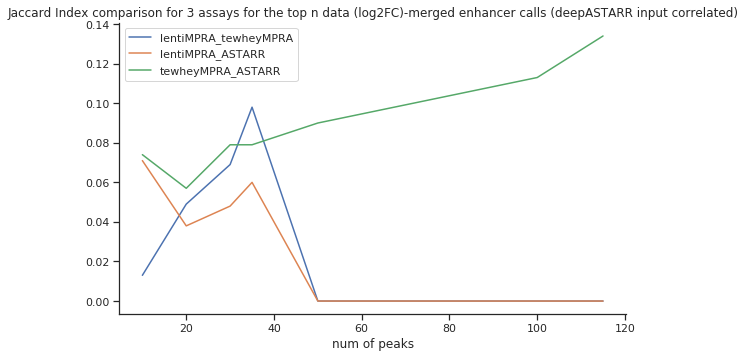

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = [[10,0.013,0.071,0.074],[20,0.049,0.038,0.057],[30,0.069,0.048,0.079],[35,0.098,0.060,0.079],[50,0,0,0.090],[100,0,0,0.113],[115,0,0,0.134]]
jaccard_index_num = pd.DataFrame(data, columns=['num of peaks','lentiMPRA_tewheyMPRA','lentiMPRA_ASTARR','tewheyMPRA_ASTARR'])
print(jaccard_index_num)

jaccard_index_num.set_index('num of peaks').plot(figsize=(8,5))

sns.despine()
plt.tight_layout()
plt.title('Jaccard Index comparison for 3 assays for the top n data (log2FC)-merged enhancer calls (deepASTARR input correlated)')
plt.show()
